In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

from scipy import ndimage as ndi
from scipy.spatial import distance

from skimage import io
from skimage.color import rgb2gray
from skimage import filters
from skimage.morphology import disk

from PIL import Image, ImageDraw, ImageFilter,ImageOps
import copy
import cv2

from grain_utils import grainPreprocess,grainShow,grainMark,grainDraw


In [2]:
grain1_name='Ultra_Co6_2-040.jpg'
grain2_name='Ultra_Co11-2.jpg'
grain3_name='Ultra_Co25-1.jpg'

path='images'

grain1_pil=Image.open(path+'/'+grain1_name)
grain2_pil=Image.open(path+'/'+grain2_name)
grain3_pil=Image.open(path+'/'+grain3_name)
image=grainPreprocess.image_preprocess(grain2_pil)

D:\PROJECTS\python\grain_segmentation\grain_utils.py:44: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image=rgb2gray(img)


In [ ]:
grainShow.img_show(grad_image,cmap='gray')

## Маркировка углов и привязка вершин к пустотам

In [3]:
nodes2, classes2,classes2_num,corners2=grainMark.get_nodes_corners_classes_classesNum(image,100)

## Подсчитаем количество пустот, в которые входит угол

std:  0.0
mean:  1.0
количество пустот:  343


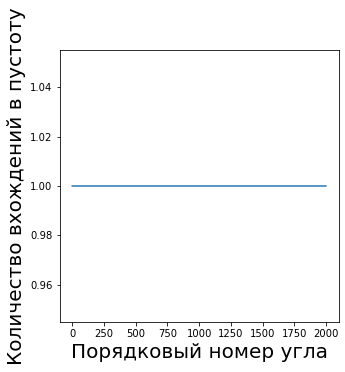

array([1., 1., 1., ..., 1., 1., 1.])

In [4]:
grainShow.classes_corners(nodes2,corners2,show=True)


## Подсчитаем количество углов у пустот

std:  4.009
mean:  1.111
количесвто углов:  3036


array([[28.],
       [ 0.],
       [ 0.],
       ...,
       [ 0.],
       [ 0.],
       [ 0.]])

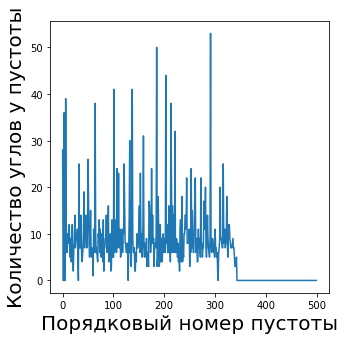

In [5]:
grainShow.corners_classes(nodes2,corners2,max_num=500,show=True)

## Соединим углы пустоты по периметру

In [6]:

radius=6
eps=0.1


new_nodes2=grainMark.sort_perimetr(image,nodes2[2:50],corners2,eps,radius)


In [ ]:
grainShow.img_show(image)

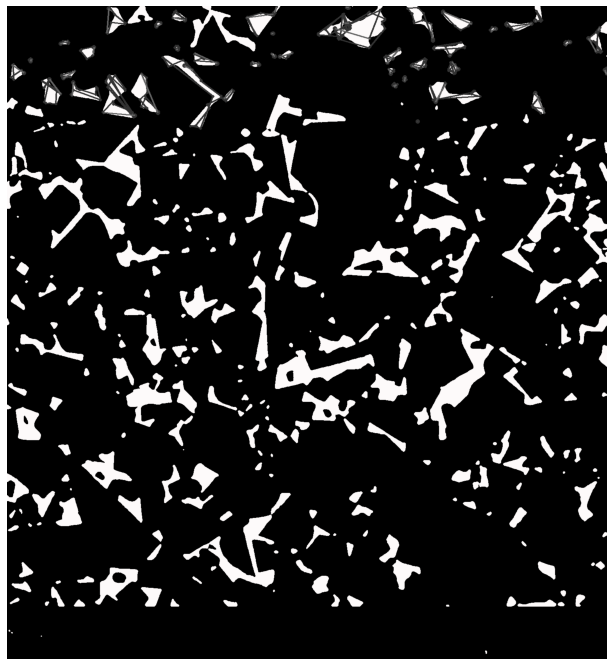

In [7]:
img=grainDraw.draw_edges(image,new_nodes2[2:50],corners2)
grainShow.img_show(img,cmap='gray',N=12)
name='vals.png'
io.imsave(name,img)

In [ ]:
img=grainDraw.draw_edges_hull(image,nodes2[2:],corners2)
grainShow.img_show(img,cmap='gray',N=12)
name='valsh.png'
io.imsave(name,img)

In [ ]:
        def sor_perimetr_hull(cls,image,nodes,corners,color=(51,51,51)):
            new_nodes=np.zeros(nodes.shape,dtype='int64')
           

            for i,node in enumerate(nodes):

                if node[0]!=0 and node[-1]>2:
                    l=node[-1]
                    points=np.zeros((l,2))
                    for j,point in enumerate(node[:l]):
                        points[j]=corners[point,0] 
                    step=0
                    hull=ConvexHull(points).simplices
                    v1=hull[0][0]
                    v2=hull[0][1]
                    while step<l:
                        index=np.where(hull==v2 &  )

            for j,node in enumerate(nodes):
                if len(node)>1:
                    r=3
                    len_node=node[-1]

                    for i,point in enumerate(node[: len_node]):
                        point2=corners[point][0]
                        x2,y2=point2[0],point2[1]

                else:
                    continue

          

            return  img

In [ ]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
points = np.random.rand(30, 2)   # 30 random points in 2-D
hull = ConvexHull(points)

In [ ]:
points

In [ ]:
hull.simplices

In [ ]:
plt.plot(points[:,0], points[:,1], 'o')
for simplex in hull.simplices:
    print(simplex)
    print(points[simplex, 0], points[simplex, 1])
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')